## DatasetBase Usage

In [1]:
from dataset_camus import CAMUSDataset

import numpy as np
import matplotlib.pyplot as plt

### Building a generator with the parameters listed below:
1. batch size = 100
2. input size = (128, 128)
3. shuffle = True
4. n_channels = 1
5. split_ratio = 8/9

In [6]:
dataset_dir="D:/AIMedic/FinalProject_echocardiogram/echoC_Dataset/CAMUS/training"
dataset = CAMUSDataset(batch_size=100, input_size=(128, 128), shuffle=True, n_channels=1, split_ratio=8/9)

train_gen, val_gen, n_iter_train, n_iter_val= dataset.create_data_generators(dataset_dir)

### Viewing random images from the given dataset

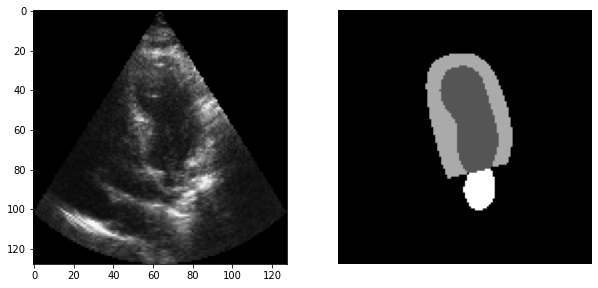

In [7]:
train_gen.random_visualization()

### Plotting the first image of 10 batches
iterating through the dataset by batches with 
> ### __*next()*__

function

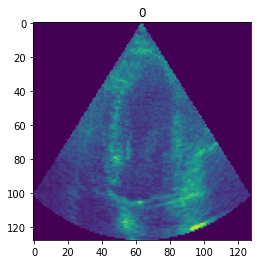

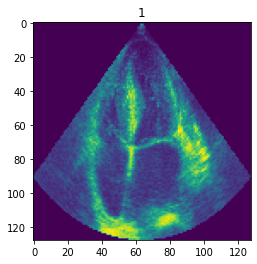

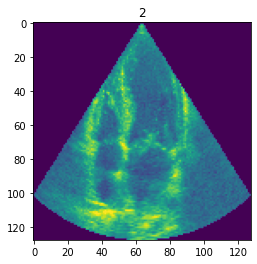

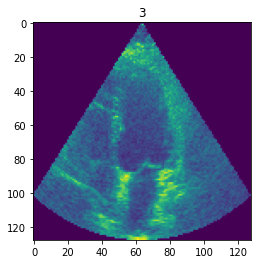

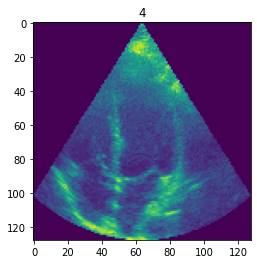

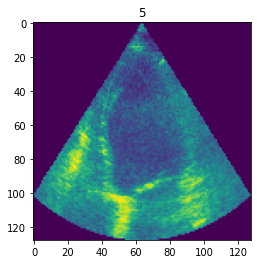

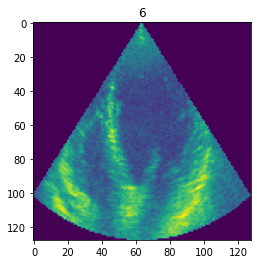

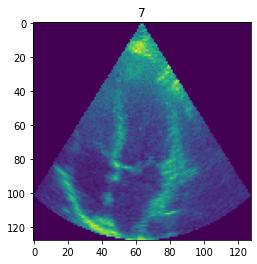

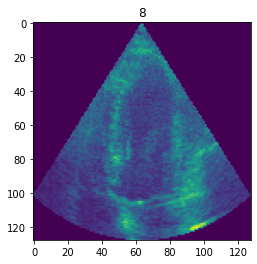

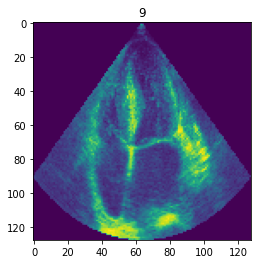

In [4]:
for i in range(10):
    item = next(train_gen)
    plt.title(i)
    plt.imshow(item[0][0])
    plt.show()

### Using U-net segmentation pre-trained model for CAMUS dataset

In [8]:
import segmentation_models as sm
from segmentation_models import Unet
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

sm.set_framework("tf.keras")

#### Model creation

In [12]:
model = Unet(
    'resnet34',
    input_shape=(128, 128, 1),
    classes=4,
    activation='softmax',
    encoder_freeze=False,
    encoder_weights=None
)

#### Model compiling

In [13]:
model.compile(optimizer='Adam', 
              loss=bce_jaccard_loss, 
              metrics=[iou_score])

#### Model training

In [14]:
model.fit(train_gen, 
          steps_per_epoch=n_iter_train, 
          epochs=5,
          validation_data=val_gen)

Epoch 1/5
8/8 [==============================] - 184s 22s/step - loss: 1.5076 - iou_score: 0.1562 - val_loss: 174457.9062 - val_iou_score: 0.0212
Epoch 2/5
8/8 [==============================] - 210s 27s/step - loss: 1.1312 - iou_score: 0.3030 - val_loss: 85904.1172 - val_iou_score: 0.0498
Epoch 3/5
8/8 [==============================] - 219s 27s/step - loss: 0.8679 - iou_score: 0.4463 - val_loss: 1895251.3750 - val_iou_score: 0.0636
Epoch 4/5
8/8 [==============================] - 200s 25s/step - loss: 0.6355 - iou_score: 0.5866 - val_loss: 55229.2148 - val_iou_score: 0.1242
Epoch 5/5
8/8 [==============================] - 182s 22s/step - loss: 0.4614 - iou_score: 0.6965 - val_loss: 3363.8503 - val_iou_score: 0.1285
